In [2]:
# An Introduction to scikit-learn: Machine Learning in Python
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy
print('numpy:', numpy.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

import seaborn
print('seaborn', seaborn.__version__)

IPython: 5.1.0
numpy: 1.13.1
scipy: 0.19.1
matplotlib: 2.0.2
scikit-learn: 0.19.0
seaborn 0.8.1


In [1]:
# Introduction to Scikit-Learn: Machine Learning with Python

In [2]:
%matplotlib inline

# set seaborn plot defaults.
# This can be safely commented out
import seaborn; seaborn.set()

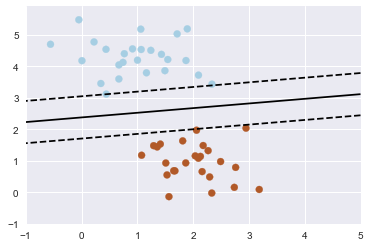

In [3]:
# Import the example plot from the figures directory
from fig_code import plot_sgd_separator
plot_sgd_separator()

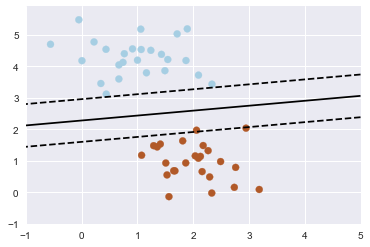

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

def plot_sgd_separator():
    # we create 50 separable points
    X, Y = make_blobs(n_samples=50, centers=2,
                      random_state=0, cluster_std=0.60)

    # fit the model
    clf = SGDClassifier(loss="hinge", alpha=0.01,
                        max_iter=200, fit_intercept=True)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    xx = np.linspace(-1, 5, 10)
    yy = np.linspace(-1, 5, 10)

    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = clf.decision_function(np.array([x1, x2]).reshape(1, -1))
        Z[i, j] = p[0]
    levels = [-1.0, 0.0, 1.0]
    linestyles = ['dashed', 'solid', 'dashed']
    colors = 'k'

    ax = plt.axes()
    ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

    ax.axis('tight')


if __name__ == '__main__':
    plot_sgd_separator()
    plt.show()


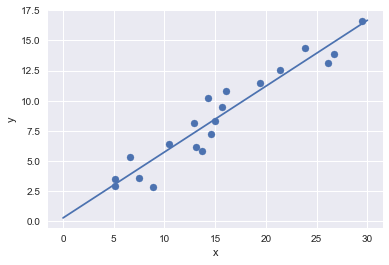

In [15]:
from fig_code import plot_linear_regression
plot_linear_regression()

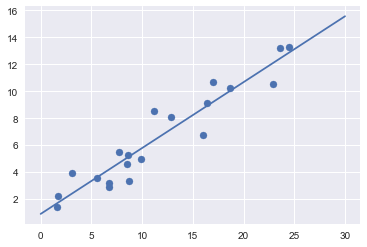

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

a = 0.5
b = 1.0

# x from 0 to 10
x = 30 * np.random.random(20)

# y = a*x + b with noise
y = a * x + b + np.random.normal(size=x.shape)

clf=LinearRegression()
clf.fit(x[:,None],y)

x_new=np.linspace(0,30,100)
y_new=clf.predict(x_new[:,None])

plt.scatter(x,y)
plt.plot(x_new,y_new)

In [31]:
from IPython.core.display import Image, display

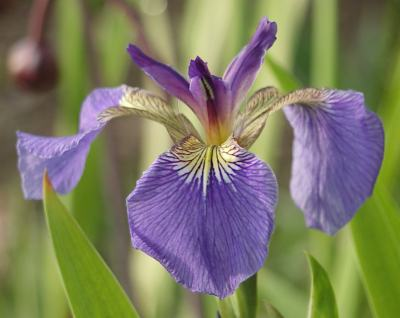

Iris Setosa



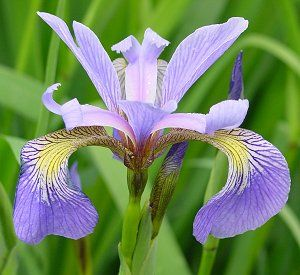

Iris Versicolor



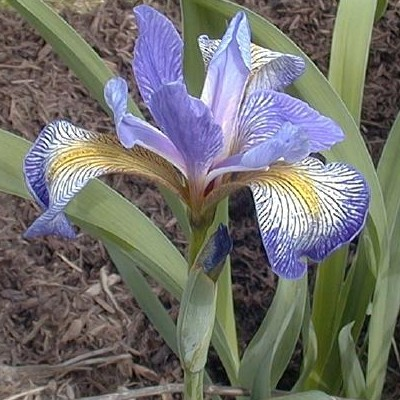

Iris Virginica


In [33]:
display(Image(filename='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='images/iris_virginica.jpg'))
print("Iris Virginica")

In [34]:
from sklearn import datasets

In [37]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [39]:
n_samples, n_features = iris.data.shape

In [40]:
n_features

4

In [41]:
n_samples

150

In [42]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


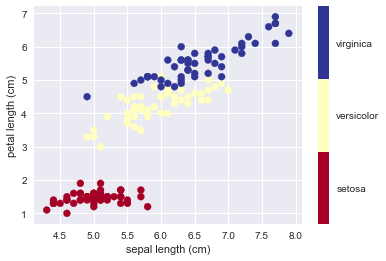

In [50]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 2

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

In [51]:
'''
Available Data
They come in three flavors:

Packaged Data: these small datasets are packaged with the scikit-learn installation, and can be downloaded using the tools in sklearn.datasets.load_*
Downloadable Data: these larger datasets are available for download, and scikit-learn includes tools which streamline this process. These tools can be found in sklearn.datasets.fetch_*
Generated Data: there are several datasets which are generated from models based on a random seed. These are available in the sklearn.datasets.make_*

'''

'\nAvailable Data\nThey come in three flavors:\n\nPackaged Data: these small datasets are packaged with the scikit-learn installation, and can be downloaded using the tools in sklearn.datasets.load_*\nDownloadable Data: these larger datasets are available for download, and scikit-learn includes tools which streamline this process. These tools can be found in sklearn.datasets.fetch_*\nGenerated Data: there are several datasets which are generated from models based on a random seed. These are available in the sklearn.datasets.make_*\n\n'

In [52]:
# Basic Principles of Machine Learning

In [57]:
x = np.arange(10)
y = 2 * x + 1

In [58]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
x[:,np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [65]:
X=x[:,None]

In [66]:
model=LinearRegression()
model.fit(X,y)
print(model.coef_)
print(model.intercept_)

[ 2.]
1.0


In [67]:
# Classification Example
# K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

In [68]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


In [69]:
knn.predict_proba([[3, 5, 4, 2],])

array([[ 0. ,  0.8,  0.2]])

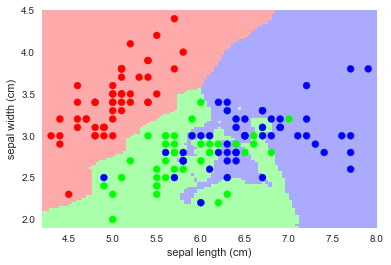

In [70]:
from fig_code import plot_iris_knn
plot_iris_knn()

In [71]:
# Regression Example
# One of the simplest regression problems is fitting a line to data, which we saw above. Scikit-learn also contains more sophisticated regression algorithms

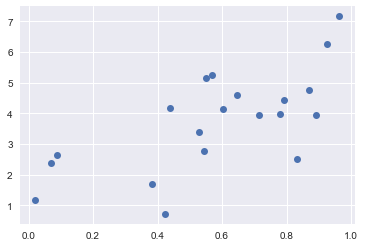

In [72]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');


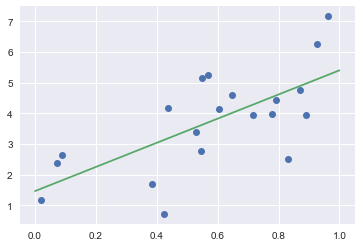

In [73]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);